# Milestone Project: SkimLit

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/
!ls pubmed-rct/PubMed_20k_RCT/

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [ ]:
import os
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + "train.txt")

In [ ]:
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 614 ms, sys: 266 ms, total: 880 ms
Wall time: 1.16 s


In [ ]:
train_samples[:13]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [ ]:
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

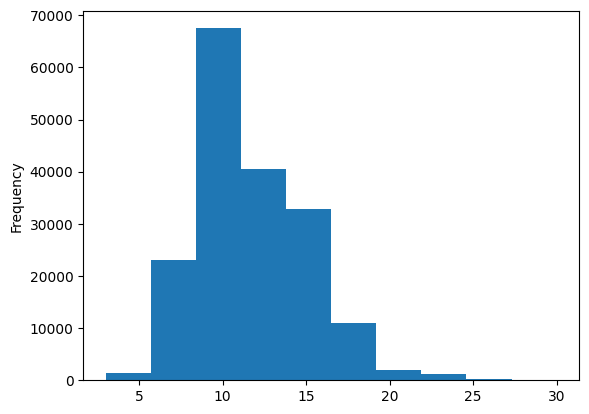

In [ ]:
train_df.total_lines.plot.hist();

### Get list of sentences

In [ ]:
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### One Hot Encoder

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
train_labels_encoded.shape

(180040,)

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
class_names, num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

## Model 0 - Baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences, y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-10 21:05:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-10 21:05:27 (77.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 1 - Conv1D with token embeddings

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

26.338269273494777

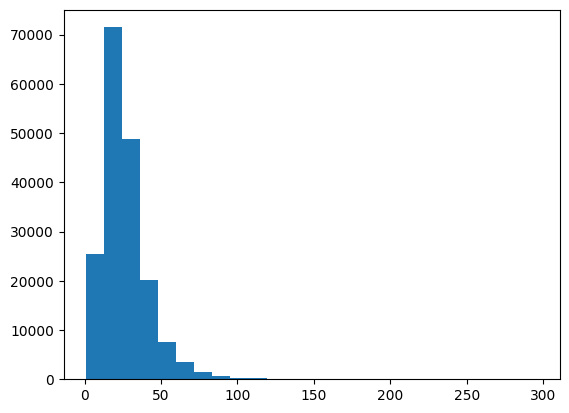

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=25);

In [ ]:
# How long of a sentence length covers 95% examples?
output_seq_length = int(np.percentile(sent_lens, 95))
output_seq_length

55

In [ ]:
# Maximum sequence length in training set
max(sent_lens)

296

### Text Vectorizer Layer

In [ ]:
# How many words are in our vocab?
max_tokens = 68000

In [ ]:
# Create Text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length=output_seq_length)

In [ ]:
# Adapt text vectorizer to training data
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text: {target_sentence}")
print(f"Length of the text: {len(target_sentence.split())}")
print(f"Vectorized Version of the text: {text_vectorizer([target_sentence])}")

Text: however , better results should be achieved before using nbi or fice as real-time optical biopsy of colorectal polyps in screening colonoscopy .
Length of the text: 23
Vectorized Version of the text: [[  140   252   117   406    36   454   129    59  6371    16 14035    25
   2383  2208  1220     4  1264  4015     5   387  1629     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in voab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in voab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Custom Text Embedding

In [ ]:
len(rct_20k_text_vocab)

64841

In [ ]:
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab),
                               output_dim=128,
                               mask_zero=True,
                               name="token_embedding")

In [ ]:
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
print(f"Vectorized sentence shape: {vectorized_sentence.shape}")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 however , better results should be achieved before using nbi or fice as real-time optical biopsy of colorectal polyps in screening colonoscopy .

Sentence after vectorization (before embedding):
 [[  140   252   117   406    36   454   129    59  6371    16 14035    25
   2383  2208  1220     4  1264  4015     5   387  1629     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Vectorized sentence shape: (1, 55)
Sentence after embedding:
 [[[-0.00457942 -0.0102677  -0.03612441 ...  0.03777674  0.00218439
   -0.0451966 ]
  [-0.01355173  0.04046481 -0.00271977 ... -0.04383896  0.03958746
    0.01348675]
  [ 0.00476198  0.02217091  0.04211446 ... -0.03731133  0.00080166
    0.0155804 ]
  ...
  [-0.03314594 -0.01498552  0.02828747 ... -0.01823913 -0.02663196
    0.03598018]
  [-0.03314594 -0.01498552  0

## Creating Dataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model 1 Building

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                           

In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 37s 64ms/step - loss: 0.9088 - accuracy: 0.6423 - val_loss: 0.6773 - val_accuracy: 0.7447
Epoch 2/3
562/562 [==============================] - 36s 64ms/step - loss: 0.6527 - accuracy: 0.7596 - val_loss: 0.6276 - val_accuracy: 0.7726
Epoch 3/3
562/562 [==============================] - 37s 65ms/step - loss: 0.6169 - accuracy: 0.7721 - val_loss: 0.5964 - val_accuracy: 0.7869


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.5982 - accuracy: 0.7866


[0.5982487201690674, 0.7866079807281494]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 4s 4ms/step


(array([[4.1813764e-01, 1.9230303e-01, 6.0430273e-02, 2.9912427e-01,
         3.0004721e-02],
        [4.7790891e-01, 2.3605460e-01, 1.4739447e-02, 2.6249081e-01,
         8.8061914e-03],
        [1.6752295e-01, 5.6283474e-03, 2.1705192e-03, 8.2462430e-01,
         5.3883723e-05],
        ...,
        [4.5657903e-06, 7.6726923e-04, 7.6506258e-04, 5.0669669e-06,
         9.9845803e-01],
        [5.4724056e-02, 4.6385330e-01, 9.3184441e-02, 6.1737522e-02,
         3.2650071e-01],
        [1.5596746e-01, 7.1688300e-01, 5.2913073e-02, 3.6465131e-02,
         3.7771288e-02]], dtype=float32),
 (30212, 5))

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
model_1_results = calculate_results(val_labels_encoded,
                                    model_1_preds)
model_1_results

{'accuracy': 78.66079703429101,
 'precision': 0.7834565958862827,
 'recall': 0.7866079703429101,
 'f1': 0.7841135357837381}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2 - Feature Extraction with Pretrained Embedding

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False)

In [ ]:
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Embedded sentence:\n {use_embedded_sentence}\n")
print(f"Length of the embedded sentence: {len(use_embedded_sentence)}")

Random sentence:
 assessment of performing each technique , sensory and motor blockades , occurrence of acute systemic toxicity and haematoma formation were compared .

Embedded sentence:
 [[ 4.31413427e-02  2.02358477e-02  3.34702283e-02  3.51992287e-02
   8.30850080e-02  3.69891338e-02  6.41778335e-02 -3.53823300e-03
   2.14340612e-02  6.36810660e-02  6.04746789e-02 -1.35096954e-02
   7.72821829e-02  7.18700662e-02 -3.24422196e-02 -7.37695098e-02
  -6.01316802e-02 -7.38677382e-03  3.04261558e-02 -6.31783307e-02
   6.30282834e-02 -1.26472041e-02 -8.25845003e-02 -1.34131666e-02
  -4.63929437e-02 -6.58291653e-02 -6.18592724e-02  8.38007033e-03
   2.72550620e-02  7.82956406e-02  1.75110046e-02  3.91768068e-02
   3.91595848e-02  3.48904021e-02 -6.63195476e-02 -4.91675828e-03
  -1.48966629e-02 -7.21457973e-02  6.71829805e-02 -6.97149858e-02
  -4.18868549e-02  8.67240131e-03  3.47076356e-02  4.50930782e-02
  -2.38015428e-02  5.53847067e-02 -2.02410463e-02 -4.24442478e-02
   3.72562446e-02  

In [ ]:
use_embedded_sentence.shape

TensorShape([1, 512])

### Building and fitting an NLP feature extraction model using pretrained embeddings

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_USE_feature_extractor")

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
history_model_2 = model_2.fit(train_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              validation_data=valid_dataset,
                              validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 12ms/step - loss: 0.9189 - accuracy: 0.6500 - val_loss: 0.7965 - val_accuracy: 0.6902
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.7686 - accuracy: 0.7025 - val_loss: 0.7536 - val_accuracy: 0.7045
Epoch 3/3
562/562 [==============================] - 6s 10ms/step - loss: 0.7511 - accuracy: 0.7139 - val_loss: 0.7360 - val_accuracy: 0.7114


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.7395 - accuracy: 0.7141


[0.7395304441452026, 0.7140871286392212]

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 7s 7ms/step


array([[0.42083204, 0.38117978, 0.00188929, 0.18857495, 0.00752398],
       [0.35028246, 0.47913942, 0.00439057, 0.16343684, 0.0027507 ],
       [0.22211236, 0.15384719, 0.01418182, 0.57492566, 0.03493295],
       ...,
       [0.00231822, 0.00624289, 0.06744128, 0.00114087, 0.92285675],
       [0.00470999, 0.04911087, 0.21805765, 0.00212018, 0.72600126],
       [0.16923141, 0.2596714 , 0.4903292 , 0.00786115, 0.07290684]],
      dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(val_labels_encoded,
                                    model_2_preds)
model_2_results

{'accuracy': 71.40871177015755,
 'precision': 0.7140602908571089,
 'recall': 0.7140871177015755,
 'f1': 0.7108925821672474}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 3 - Conv1D with character embeddings

### Character level tokenization

In [ ]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_train_sentence)

'a s s e s s m e n t   o f   p e r f o r m i n g   e a c h   t e c h n i q u e   ,   s e n s o r y   a n d   m o t o r   b l o c k a d e s   ,   o c c u r r e n c e   o f   a c u t e   s y s t e m i c   t o x i c i t y   a n d   h a e m a t o m a   f o r m a t i o n   w e r e   c o m p a r e d   .'

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
avg_char_lens = np.mean(char_lens)
avg_char_lens

149.3662574983337

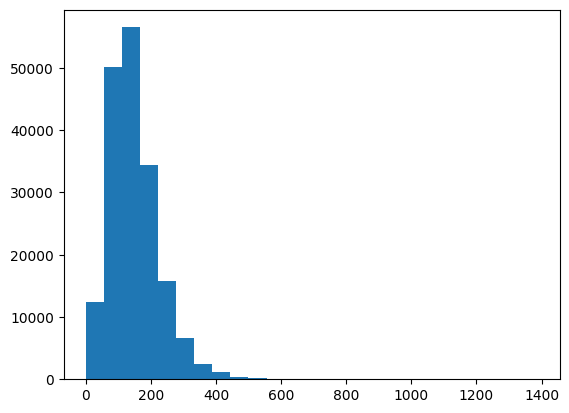

In [ ]:
plt.hist(char_lens, bins=25);

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    name="char_vectorizer")

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in vocab: {len(char_vocab)}")
print(f"Most common characters: {char_vocab[:5]}")
print(f"Least common characters: {char_vocab[-5:]}")

Number of different characters in vocab: 28
Most common characters: ['', '[UNK]', 'e', 't', 'i']
Least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars = random.choice(train_chars)
print(f"Charified Text:\n {random_train_chars}\n")
print(f"Length of Charified Text:\n {len(random_train_chars.split())}\n")
vectorized_chars = char_vectorizer(random_train_chars)
print(f"Vectorized chars:\n {vectorized_chars}\n")
print(f"Length of Vectorized Chars:\n {len(vectorized_chars)}")

Charified Text:
 m e n t a l   h e a l t h   w a s   m e a s u r e d   u s i n g   t h e   a c h o l i   p s y c h o s o c i a l   a s s e s s m e n t   i n s t r u m e n t   f o r   l o c a l   d e p r e s s i o n - l i k e   (   d l s   )   a n d   a n x i e t y - l i k e   (   a l s   )   s y n d r o m e s   .

Length of Charified Text:
 127

Vectorized chars:
 [15  2  6  3  5 12 13  2  5 12  3 13 20  5  9 15  2  5  9 16  8  2 10 16
  9  4  6 18  3 13  2  5 11 13  7 12  4 14  9 19 11 13  7  9  7 11  4  5
 12  5  9  9  2  9  9 15  2  6  3  4  6  9  3  8 16 15  2  6  3 17  7  8
 12  7 11  5 12 10  2 14  8  2  9  9  4  7  6 12  4 23  2 10 12  9  5  6
 10  5  6 24  4  2  3 19 12  4 23  2  5 12  9  9 19  6 10  8  7 15  2  9
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

### Creating a character level embedding

In [ ]:
char_embed = layers.Embedding(input_dim=len(char_vocab),
                              output_dim=25,
                              mask_zero=True,
                              name="char_embed")

In [ ]:
print(f"Charified text (before vectorization & embedding):\n {random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer(random_train_chars))
print(f"Embedded text:\n {char_embed_example}\n")
print(f"Shape of embedded text: {char_embed_example.shape}")

Charified text (before vectorization & embedding):
 m e n t a l   h e a l t h   w a s   m e a s u r e d   u s i n g   t h e   a c h o l i   p s y c h o s o c i a l   a s s e s s m e n t   i n s t r u m e n t   f o r   l o c a l   d e p r e s s i o n - l i k e   (   d l s   )   a n d   a n x i e t y - l i k e   (   a l s   )   s y n d r o m e s   .

Embedded text:
 [[ 0.04227669  0.04398549 -0.04514519 ... -0.02470556  0.01500023
   0.01305975]
 [ 0.02282497 -0.02491281 -0.04353603 ... -0.02428395  0.00153939
  -0.00281524]
 [ 0.00870199  0.02215267 -0.01702155 ...  0.01007893 -0.02880896
   0.01290501]
 ...
 [-0.02144526  0.03692449  0.04595995 ... -0.04466088 -0.04507807
   0.04125408]
 [-0.02144526  0.03692449  0.04595995 ... -0.04466088 -0.04507807
   0.04125408]
 [-0.02144526  0.03692449  0.04595995 ... -0.04466088 -0.04507807
   0.04125408]]

Shape of embedded text: (290, 25)


### Building and fitting model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeds = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeds)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_conv1D_char_embeddings")

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "model_3_conv1D_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_3 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_14 (Dense)            (None, 

In [ ]:
# Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
history_model_3 = model_3.fit(train_char_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_char_dataset)),
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 14ms/step - loss: 1.2713 - accuracy: 0.4836 - val_loss: 1.0504 - val_accuracy: 0.5685
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 1.0116 - accuracy: 0.5912 - val_loss: 0.9632 - val_accuracy: 0.6210
Epoch 3/3
562/562 [==============================] - 8s 13ms/step - loss: 0.9318 - accuracy: 0.6341 - val_loss: 0.8890 - val_accuracy: 0.6463


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 5ms/step - loss: 0.8999 - accuracy: 0.6488


[0.8999269604682922, 0.6488150358200073]

In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 5s 5ms/step


array([[0.24791905, 0.4150408 , 0.06835023, 0.2150341 , 0.05365583],
       [0.1428209 , 0.49009973, 0.01832722, 0.3009654 , 0.0477868 ],
       [0.14686769, 0.15571399, 0.15285818, 0.44551685, 0.09904317],
       ...,
       [0.06884367, 0.06633665, 0.15327427, 0.08195601, 0.62958944],
       [0.0353597 , 0.27744815, 0.41489503, 0.06254233, 0.20975484],
       [0.43868837, 0.36979467, 0.0603563 , 0.1072004 , 0.02396026]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 2, 0])>

In [ ]:
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 64.88150403813054,
 'precision': 0.6475989401703864,
 'recall': 0.6488150403813054,
 'f1': 0.6365827852569562}

## Model 4 - Combining pretrained token embeddings + character embeddings (hybrid embeddings)

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

In [ ]:
# 2. Setup char inputs/model
char_inputs = layers.Input(shape=[], dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [ ]:
# 3. Concatenate token and char inputs
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

In [ ]:
# 4. Build a series of output layer on 3.
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

In [ ]:
# 5. Construct model with char and token input
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.inputs],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None,)]                    0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 keras_layer_1 (KerasLayer)  (None, 512)                  2567978 

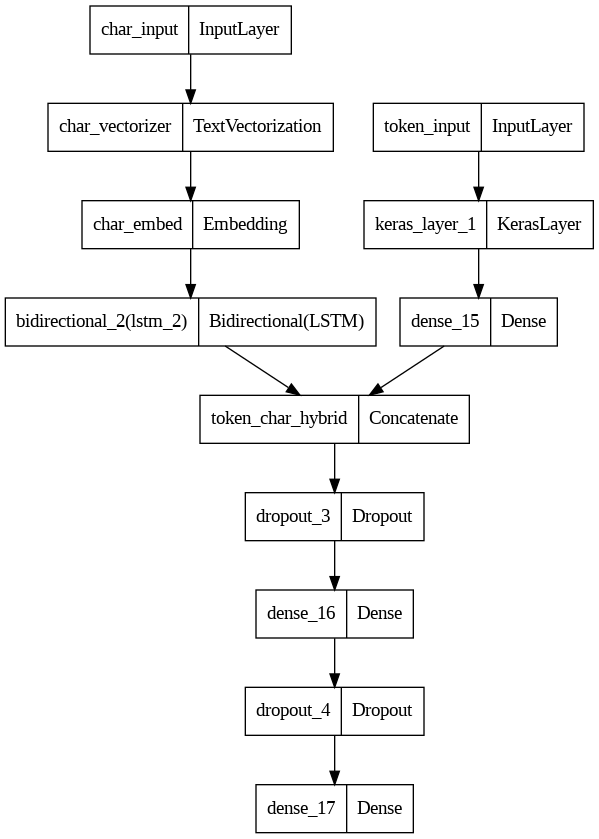

In [ ]:
from keras.utils import plot_model

plot_model(model_4)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Combining token and character data into a tf.data Dataset

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip(train_char_token_data, train_char_token_labels)

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip(val_char_token_data, val_char_token_labels)

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip(test_char_token_data, test_char_token_labels)

test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting model

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 108s 180ms/step - loss: 0.9870 - accuracy: 0.6063 - val_loss: 0.7882 - val_accuracy: 0.6951
Epoch 2/3
562/562 [==============================] - 96s 171ms/step - loss: 0.7994 - accuracy: 0.6901 - val_loss: 0.7116 - val_accuracy: 0.7340
Epoch 3/3
562/562 [==============================] - 98s 174ms/step - loss: 0.7659 - accuracy: 0.7089 - val_loss: 0.6849 - val_accuracy: 0.7394


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 37s 39ms/step - loss: 0.6930 - accuracy: 0.7340


[0.6930263042449951, 0.7339798808097839]

In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 44s 42ms/step


array([[4.2320526e-01, 4.0146282e-01, 3.6934924e-03, 1.6034824e-01,
        1.1290188e-02],
       [3.4311900e-01, 4.1913012e-01, 4.0097092e-03, 2.3030640e-01,
        3.4347989e-03],
       [2.9049376e-01, 1.2121083e-01, 3.0901609e-02, 5.3176665e-01,
        2.5627106e-02],
       ...,
       [2.5203472e-04, 6.3242144e-03, 6.0131192e-02, 9.6635842e-05,
        9.3319589e-01],
       [3.4283756e-03, 3.8502738e-02, 1.8306649e-01, 2.1045455e-03,
        7.7289784e-01],
       [3.9006752e-01, 3.0075806e-01, 2.4695241e-01, 2.3091277e-02,
        3.9130699e-02]], dtype=float32)

In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [ ]:
model_4_results = calculate_results(val_labels_encoded,
                                    model_4_preds)
model_4_results

{'accuracy': 73.39798755461406,
 'precision': 0.7324017201230436,
 'recall': 0.7339798755461406,
 'f1': 0.731509068774251}

## Model 5 - Transfer Learning with token embedding + character embedding + positional embedding

In [ ]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11


In [ ]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

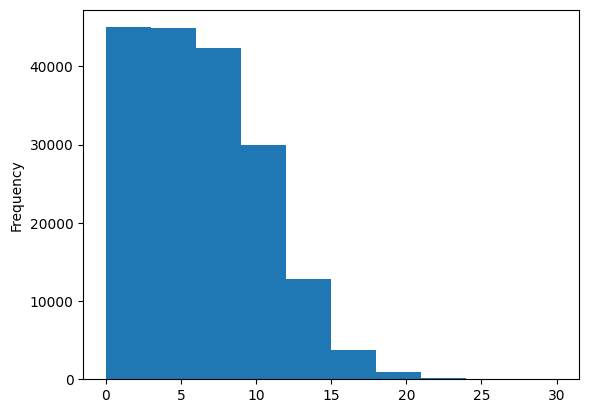

In [ ]:
train_df.line_number.plot.hist();

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
train_line_numbers_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

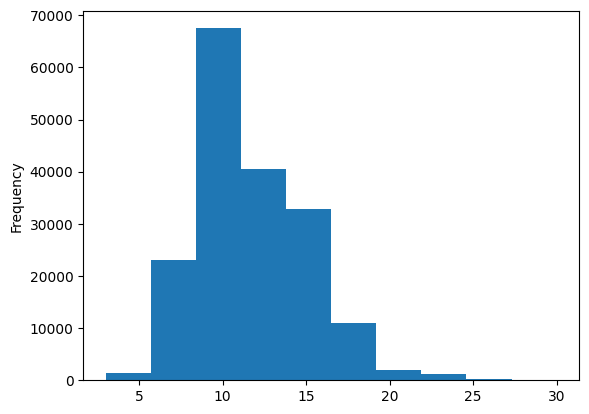

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
train_total_lines_one_hot[:10], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

In [ ]:
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

### Creating Model 5

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

In [ ]:
# 2. Char inputs
char_inputs = layers.Input(shape=(1, ), dtype=tf.string, name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [ ]:
# 3. Line number model
line_number_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_inputs")
line_number_outputs = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)

In [ ]:
# 4. Total line model
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.float32, name="total_lines_inputs")
total_lines_outputs = layers.Dense(32, activation="relu")(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)

In [ ]:
# 5. Combine 1 & 2 into hybrid embeddings
combined_embeddings = layers.Concatenate(name="token_char_embeddings")([token_model.output,
                                                                        char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

In [ ]:
# 6. Combine the output of 3, 4, 5
tribrid_embeddings = layers.Concatenate(name="token_char_positional_embeddings")([line_number_model.output,
                                                                                  total_lines_model.output,
                                                                                  z])

In [ ]:
# 7. Create output layers
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(tribrid_embeddings)

In [ ]:
# 8. Put together all inputs
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [ ]:
model_5.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 keras_layer_1 (KerasLayer)  (None, 512)                  2567978   ['token_inputs[0][0]'] 

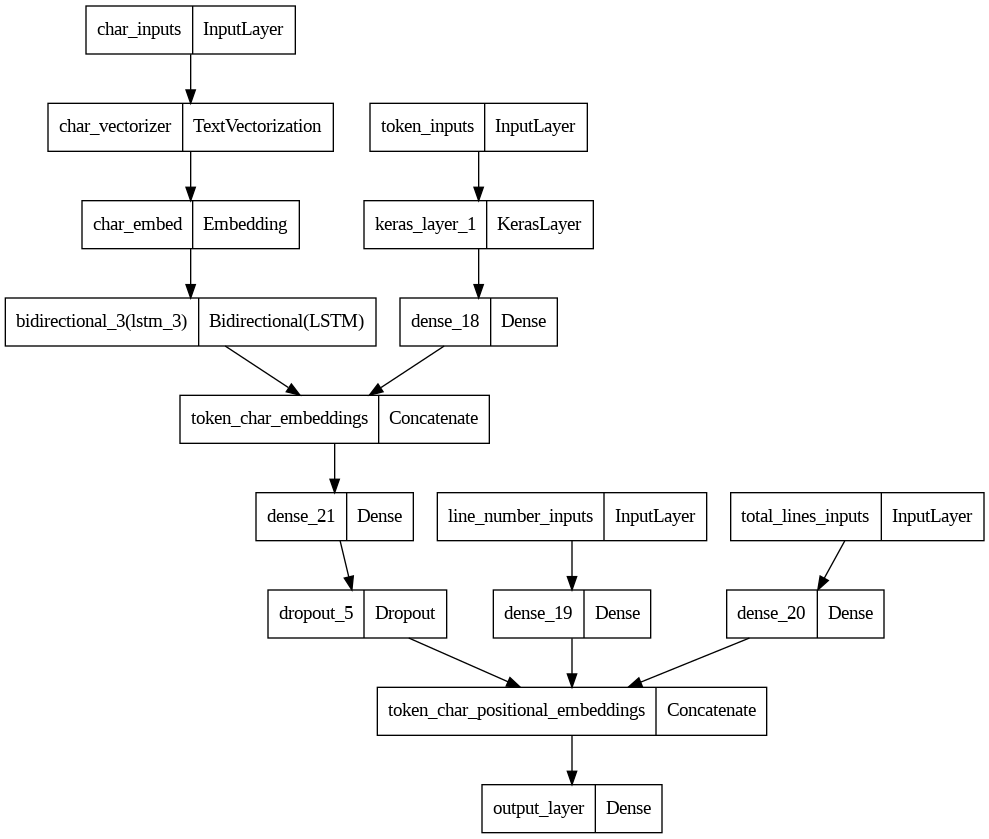

In [ ]:
from keras.utils import plot_model

plot_model(model_5)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Create tribrid embedding dataset using tf.data

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                             val_total_lines_one_hot,
                                                             val_sentences,
                                                             val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset, val_char_token_pos_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting, Evaluating, and Making predictions with Model 5

In [ ]:
history_model_5 = model_5.fit(train_char_token_pos_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                              validation_data=val_char_token_pos_dataset,
                              validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 103s 172ms/step - loss: 1.0992 - accuracy: 0.7210 - val_loss: 0.9803 - val_accuracy: 0.8045
Epoch 2/3
562/562 [==============================] - 98s 174ms/step - loss: 0.9653 - accuracy: 0.8155 - val_loss: 0.9466 - val_accuracy: 0.8331
Epoch 3/3
562/562 [==============================] - 94s 167ms/step - loss: 0.9486 - accuracy: 0.8254 - val_loss: 0.9379 - val_accuracy: 0.8361


In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs

945/945 [==============================] - 38s 38ms/step


array([[0.4966964 , 0.1122798 , 0.00883852, 0.36904424, 0.01314112],
       [0.6092802 , 0.07611588, 0.03772131, 0.2693297 , 0.00755283],
       [0.2797318 , 0.11339428, 0.15128778, 0.38531306, 0.0702731 ],
       ...,
       [0.03706152, 0.10029831, 0.04104382, 0.02889884, 0.7926975 ],
       [0.03354445, 0.31205055, 0.0738937 , 0.0256335 , 0.5548778 ],
       [0.27828306, 0.5036499 , 0.11320684, 0.04392854, 0.06093163]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results = calculate_results(val_labels_encoded,
                                    model_5_preds)
model_5_results

{'accuracy': 83.33774659075864,
 'precision': 0.8324749952819045,
 'recall': 0.8333774659075864,
 'f1': 0.8325213345533143}

## Compare model results

In [ ]:
all_model_results = pd.DataFrame({"model_0_baseline": baseline_results,
                                  "model_1_custom_token_embedding": model_1_results,
                                  "model_2_pretrained_token_embedding": model_2_results,
                                  "model_3_custom_char_embedding": model_3_results,
                                  "model_4_hybrid_char_token_embedding": model_4_results,
                                  "model_5_tribrid_char_token_pos_embedding": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.660797,0.783457,0.786608,0.784114
model_2_pretrained_token_embedding,71.408712,0.714060,0.714087,0.710893
model_3_custom_char_embedding,64.881504,0.647599,0.648815,0.636583
model_4_hybrid_char_token_embedding,73.397988,0.732402,0.733980,0.731509
model_5_tribrid_char_token_pos_embedding,83.337747,0.832475,0.833377,0.832521


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,0.721832,0.718647,0.721832,0.698925
model_1_custom_token_embedding,0.786608,0.783457,0.786608,0.784114
model_2_pretrained_token_embedding,0.714087,0.714060,0.714087,0.710893
model_3_custom_char_embedding,0.648815,0.647599,0.648815,0.636583
model_4_hybrid_char_token_embedding,0.733980,0.732402,0.733980,0.731509
model_5_tribrid_char_token_pos_embedding,0.833377,0.832475,0.833377,0.832521


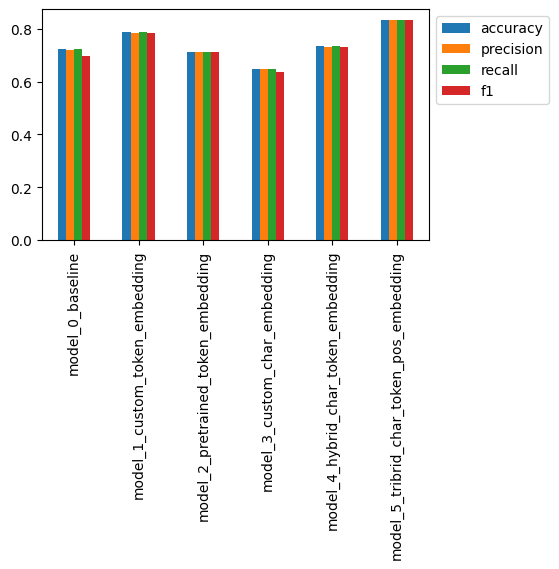

In [ ]:
all_model_results.plot(kind="bar", figsize=(5, 3)).legend(bbox_to_anchor=(1.0, 1.0));

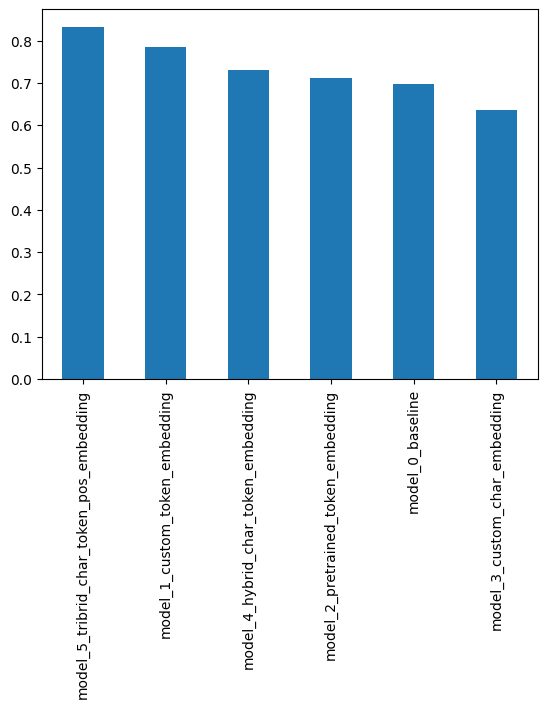

In [ ]:
# Sort models results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar");

## Save and load model_5

In [ ]:
model_5.save("model_5_token_char_pos_model")

In [ ]:
loaded_model_5 = tf.keras.models.load_model("model_5_token_char_pos_model")
loaded_model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 38s 37ms/step - loss: 0.9365 - accuracy: 0.8334


[0.9364558458328247, 0.833377480506897]

In [ ]:
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 35s 37ms/step - loss: 0.9365 - accuracy: 0.8334


[0.9364558458328247, 0.833377480506897]

In [ ]:
loaded_model_pred_probs = loaded_model_5.predict(val_char_token_pos_dataset)
loaded_model_pred_probs

945/945 [==============================] - 38s 38ms/step


array([[0.4966964 , 0.1122798 , 0.00883852, 0.36904424, 0.01314112],
       [0.6092802 , 0.07611588, 0.03772131, 0.2693297 , 0.00755283],
       [0.2797318 , 0.11339428, 0.15128778, 0.38531306, 0.0702731 ],
       ...,
       [0.03706152, 0.10029831, 0.04104382, 0.02889884, 0.7926975 ],
       [0.03354445, 0.31205055, 0.0738937 , 0.0256335 , 0.5548778 ],
       [0.27828306, 0.5036499 , 0.11320684, 0.04392854, 0.06093163]],
      dtype=float32)

In [ ]:
loaded_model_preds = tf.argmax(loaded_model_pred_probs, axis=1)
loaded_model_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
loaded_model_results = calculate_results(y_true=val_labels_encoded,
                                         y_pred=loaded_model_preds)
loaded_model_results

{'accuracy': 83.33774659075864,
 'precision': 0.8324749952819045,
 'recall': 0.8333774659075864,
 'f1': 0.8325213345533143}

In [ ]:
model_5_results

{'accuracy': 83.33774659075864,
 'precision': 0.8324749952819045,
 'recall': 0.8333774659075864,
 'f1': 0.8325213345533143}

In [ ]:
test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
loaded_model_5.evaluate(test_char_token_pos_dataset)

942/942 [==============================] - 63s 67ms/step - loss: 0.9440 - accuracy: 0.8289


[0.9439529180526733, 0.8289364576339722]

In [ ]:
loaded_model_5_test_pred_probs = loaded_model_5.predict(test_char_token_pos_dataset)

942/942 [==============================] - 85s 90ms/step


In [ ]:
loaded_model_5_preds = tf.argmax(loaded_model_5_test_pred_probs, axis=1)

In [ ]:
loaded_model_5_test_results = calculate_results(y_true=test_labels_encoded,
                                                y_pred=loaded_model_5_preds)
loaded_model_5_test_results

{'accuracy': 82.89364526298324,
 'precision': 0.8277183196298477,
 'recall': 0.8289364526298324,
 'f1': 0.8280025879273869}

In [ ]:
loaded_model_results

{'accuracy': 83.33774659075864,
 'precision': 0.8324749952819045,
 'recall': 0.8333774659075864,
 'f1': 0.8325213345533143}